In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

In [5]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target%2, random_state=2)

In [6]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC(loss="hinge").fit(X_train, y_train)
svc = SVC(kernel="linear").fit(X_train, y_train)

In [7]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

1.0

##  RBF kernel

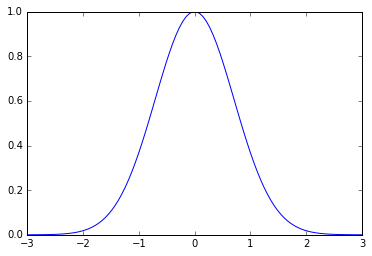

In [14]:
from sklearn.metrics.pairwise import rbf_kernel
line = np.linspace(-3,3,100)[:, np.newaxis]
kernel_value = rbf_kernel([[0]], line, gamma=1)
plt.plot(line, kernel_value.T)

In [19]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.9177777777777778

In [20]:
Cs = [0.001,0.01,0.1,1,10,100]
gammas = [0.001,0.01,0.1,1,10,100]

from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma': gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

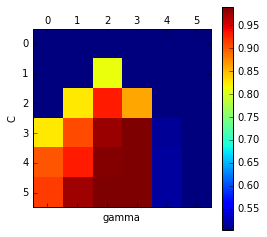

In [21]:
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6,6)
plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()